# RAMSES Fundamentals

## 1. Prerequisites

You will need a `fortran compiler` to compile RAMSES, along with some version of `MPI` if you have access to multiple cores and want to run RAMSES in parallel. You can refer to the [Instructions to get started on the CBP machine](https://ramses-tutorials.readthedocs.io/en/latest/Setup/CBP.html) or [Instructions to get started on your laptop](https://ramses-tutorials.readthedocs.io/en/latest/Setup/laptop.html) sections for some information about how to install or load those, according to your needs.

The tutorials require running `python3` in a `Jupyter notebook`, and will use different python packages and analysis tools (see the prerequisites section of each tutorial). For simplicity, we recommend [setting up a complete environment with conda](https://ramses-tutorials.readthedocs.io/en/latest/Setup/conda-setup.html).

## 2. First steps with RAMSES

RAMSES [(Teyssier 2002)](https://ui.adsabs.harvard.edu/abs/2002A%26A...385..337T/abstract) is a popular code used to produce astrophysical simulations, using the adaptive mesh refinement (AMR) numerical technique, together with state-of-the art star formation and feedback models. Each directory contains a set of files with a given common purpose. For example, amr/ contains all Fortran 90 routines dealing with the AMR grid management and MPI communications, while hydro/ contains all Fortran 90 routines dealing with hydrodynamics. RAMSES is written in Fortran 90, which can be used on massively parallel architectures thanks to the MPI library (MPI stands for Message Passing Interface). Therefore, before producing RAMSES simulations, we need to compile the RAMSES code, as explained below.

In order to **obtain and compile the code**, you can follow the first steps of the documentation at [this link](https://ramses-organisation.readthedocs.io/en/latest/wiki/Start.html), summarised (and updated) below.

### 2.1 Downloading the code

To get the RAMSES code, open a terminal, and clone the code into the Fundamentals sub-directory:

```bash
cd ramses-tutorials/Fundamentals
git clone https://github.com/ramses-organisation/ramses
```

### 2.2 Compiling the code: the Makefile

The first directory you are interested in is the bin/ directory, in which the code will be compiled thanks to the set of instructions written in the `Makefile`.

```bash
cd ramses/bin
cat Makefile
```

The first lines of the Makefile correspond to the so-called *Compilation Time Parameters*. They are used to e.g.:

- set the type of compiler to be used, the name of the RAMSES executable

- define the number of dimensions and the total number of variables needed for the simulation

- enable or disable the compilation of some of the physical modules, and of the MPI routines 

Other preprocessor directives are then defined below, in the variable `DEFINES`.

Based on the choice of compiler (`COMPILER=GNU` or `INTEL`), Fortran compiler options and directives are defined. The `F90` variable invokes the Fortran compiler (also depends on the use of MPI), while `FFLAGS` contains other compilation flags and preprocessor directives (also depends on the use of debug options). While both `F90` and `FFLAGS` can be set up using default values, one might need or want to edit them according to the compiler, the machine, or the simulation. In this case, you can manually edit `F90` and `FFLAGS` in the Makefile.

Finally, the rest of the Makefile contains the list and path of the files to be compiled.

Once the Makefile is ready, you can (re)compile the code:
```bash
make clean
make
```

### 2.3 Setting up the parameters: the namelist

To run a simulation, RAMSES needs a parameter file, which is a *Fortran namelist* ([brief intro here](http://jules-lsm.github.io/vn4.2/namelists/intro.html), and more details about the [RAMSES namelist here](https://ramses-organisation.readthedocs.io/en/latest/wiki/Runtime_Parameters.html)). Namelists can be read and written as text files, usually ending with `.nml`. They are used to assign values to RAMSES variables, to be used instead of the default values initialised in the code.

Namelist files are organised in namelist blocks, or sections (that may be provided in any order) that define parameters related to different parts of the code. Each block starts with `&BLOCK_NAME` and ends with the character `/`. Values are then declared in the corresponding block using standard Fortran namelist syntax, i.e. as `parameter_name = value` (where values for character variables must be enclosed in quotes, and logical values must be specified using `.true.` or `.false.`). The following 4 parameter blocks are mandatory and must always be present in the namelist file:


1. `RUN_PARAMS`: defines some of the most basic properties of the run

2. `AMR_PARAMS`: defines the global mesh properties and memory footprint of the code

3. `INIT_PARAMS`: tells RAMSES where to look for initial condition files

4. `OUTPUT_PARAMS`: defines the output strategy

The other blocks are optional. They must be present in the file only if they are relevant to the current run:


5. `POISSON_PARAMS`: specifies runtime parameters for the Poisson solver

6. `BOUNDARY_PARAMS`: sets up boundary conditions for the current simulation

7. `UNIT_PARAMS`: contains the parameters related to units that are set “by hand” for non cosmological runs

8. `COOLING_PARAMS`: contains parameters related to cooling / basic chemistry

9. `SF_PARAMS`: contains the parameters related to star formation

10. `FEEDBACK_PARAMS`: contains the parameters related to stellar feedback

11. `HYDRO_PARAMS`: specifies runtime parameters for the Godunov solver

12. `REFINE_PARAMS`: defines the refinement strategy

13. `SINK_PARAMS`: contains the parameters related to the sink particle implementation, for star formation or black holes

14. `CLUMPFIND_PARAMS`: contains the parameters related to the built-in RAMSES clump finder (PHEW)

15. `RT_PARAMS` and `RT_GROUPS`: sets radiative properties for RAMSES RHD runs

16. `MOVIE_PARAMS`: contains the parameters related to the movies, for creating on the fly visualizations of a simulation

The variables you can set or adjust in each namelist block are described in more details in the the [RAMSES namelist documentation](https://ramses-organisation.readthedocs.io/en/latest/wiki/Runtime_Parameters.html) and in the different tutorials.

## 3. Barotrop test

This 1-dimensional RAMSES test of a gas gravitational collapse is part of the automated RAMSES test suite. First compile a 1d RAMSES executable:
```bash
cd ramses-tutorials/Fundamentals/ramses
make clean
make NDIM=1 PATCH= SOLVER=hydro EXEC=ramses_barotrop
```
Then run the test, using the bartrop.nml namelist:
```bash
cd ramses-tutorials/Fundamentals/barotrop
../ramses/bin/ramses_barotrop1d barotrop.nml
```
You should see RAMSES start and spit out a log of its progress in the terminal. Once it is finished (this should be less than a second), you'll see two output directories, named output_00001 and output_00002.

After the run is done, you can use the cell below to plot the final result and compare to an analytic solution for the temperature versus density.

Processing 1 files in ./barotrop/output_00002
Loaded: 784 cells, 0 particles.


(1, 16106.507499725094)

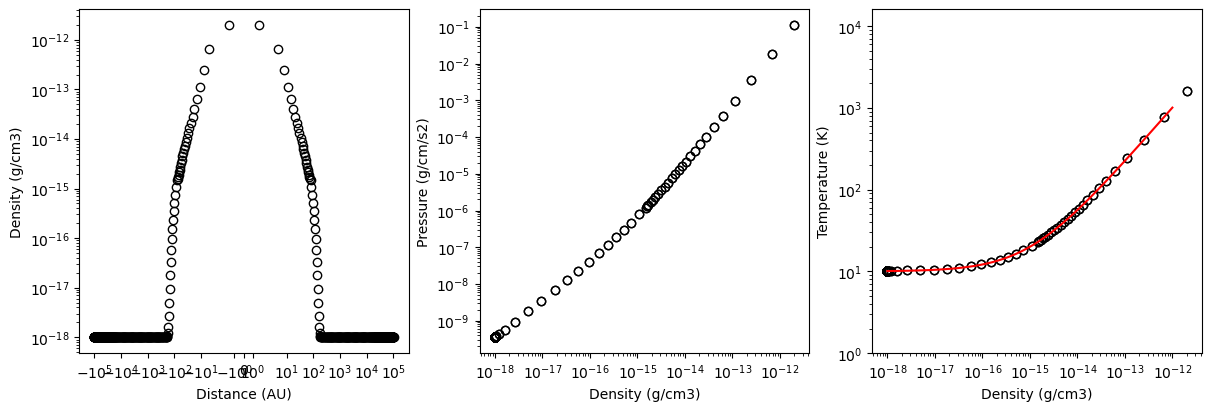

In [1]:
import osyris
import numpy as np
import matplotlib.pyplot as plt

# Fundamental constants
MH = 1.6737236e-24 #g                      # hydrogen mass
KB = 1.38064852e-16 #cm^2 g s^-2 K^-1      # Boltzman constant
PC = 3.0857e18 #cm                         # 1 parsec
AU = 1.49597871e13 #cm                     # 1 astronomical unit

# Load RAMSES output
data = osyris.Dataset(2, path="./barotrop/")
data.load()

center = osyris.Array(values=[3.0857e18/2.], unit='cm')
#osyris.plot(data["amr"]["position_x"].to("au"), data["hydro"]["density"],logy=True) #,xmin=1.535e18,xmax=1.547e18)
#osyris.plot(data["amr"]["position_x"]-center, data["hydro"]["density"],logx=True,logy=True) #,xmin=1.535e18,xmax=1.547e18)
#osyris.plot(data["amr"]["position_x"], data["amr"]["level"])
#osyris.plot(data["hydro"]["density"], data["hydro"]["pressure"],logx=True,logy=True)
#osyris.plot(data["hydro"]["density"], data["hydro"]["pressure"],logx=True,logy=True)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), constrained_layout=True)

# Load RAMSES output
#data = osyris.Dataset(2, path="./barotrop/")
#data.load()
x      = (data["amr"]["position_x"]-center).to("au").values
#x      = x.to("au").values

rho    = data["hydro"]["density"].values
p      = data["hydro"]["pressure"].values

ax[0].plot(x,rho,'o',color='black',markerfacecolor='none')
ax[0].set_xlabel('Distance (AU)')
ax[0].set_ylabel('Density (g/cm3)')
ax[0].set_xscale('symlog', linthresh=1.*PC/AU/2**16)
ax[0].set_yscale('log')

ax[1].plot(rho,p,'o',color='black',markerfacecolor='none')
ax[1].set_xlabel('Density (g/cm3)')
ax[1].set_ylabel('Pressure (g/cm/s2)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

cs = np.sqrt(p/rho)
cs2 = p/rho
T = cs2 * 2.37 * MH /KB

#analytical solution
rho_ana = np.logspace(-18,-12,50)
b3 = 10 * (1 + (rho_ana/1e-15)**(1.666667-1))

ax[2].plot(rho,T,'o',color='black',markerfacecolor='none')
ax[2].plot(rho_ana, b3, color='red')

ax[2].set_xlabel('Density (g/cm3)')
ax[2].set_ylabel('Temperature (K)')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_ylim(1,max(T)*10)

#fig.savefig('barotrop.pdf',bbox_inches='tight')
